For a simple mathematical explanation watch https://www.youtube.com/watch?v=ZVR2Way4nwQ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import tree
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(df,iris.target,test_size=0.30, random_state=101)
clf = tree.DecisionTreeClassifier(random_state=101, max_depth=2)
clf = clf.fit(X_train, y_train)
r = export_text(clf, feature_names=iris['feature_names'])

[Text(133.92000000000002, 181.2, 'X[3] <= 0.75\ngini = 0.663\nsamples = 105\nvalue = [37, 30, 38]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.65\ngini = 0.493\nsamples = 68\nvalue = [0, 30, 38]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.121\nsamples = 31\nvalue = [0, 29, 2]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

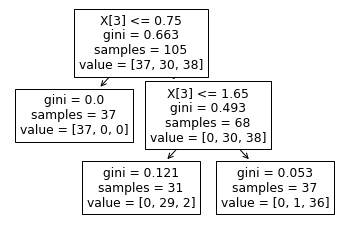

In [6]:
tree.plot_tree(clf)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = clf.predict(X_test)

In [8]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.95      0.93        20
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [9]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  2 10]]


## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=100)

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
predictions_rf = rfc.predict(X_test)

In [14]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [15]:
print(confusion_matrix(y_test, predictions_rf))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
